
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [549]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Birgül\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]     #- (tireler de missing value) ama nan olarak gelmedi, üstünlügü yok, listeler her tipte data barindirabilir
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
#yukaridaki kismi python liste ile olusturduk
#asagidaki kismi numpy array ile olusturduk
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])    # object tipinde string var onun üstünlügünden dolayi hepsini nan yapti, ayni tipten olusmasi icin array de var bu özellik
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])  #array ler tek tip data alir, biri string ise hepsini stringe cevirir.
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])  #np.nan olanlar, nan olarak olusturuldu.

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [552]:
type(np.nan)      #float a cevirmek avantajdir

float

In [553]:
type(np.NaN)    #nan larin default data type i float

float

In [554]:
type(None)    # bu da handle edilir, future arasinda engineerlik yaparken dikkat etmek gerek!!!

NoneType

In [555]:
df.salary   #np.array den creat ettik. None in üstünlügü oldu icin type ini object yapti,object string den sonra None in üstünlügü var

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [556]:
type(df.status[2])

str

In [557]:
type(df.status[10])

float

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [559]:
type(df.salary[0])

float

In [560]:
type(df.salary[6])

NoneType

In [561]:
type(df.salary[1])

int

In [562]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [563]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [564]:
type(df.status[2])

str

In [565]:
type(df.status[10])

float

In [566]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [567]:
type(df.var1[3])     #var1 np.array ile olusturuldu array ler tek tip data alir, datalarin biri string ise hepsini string e cevirir.

str

In [568]:
type(df.var1[10])  # integer ama string, array ile olusturuldu ve string int e göre öncelikli oldugu icin

str

In [569]:
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)   #yokluk yoklukla olursa yokluk verir
print(np.nan - 10)
print(np.nan + 10)
print(np.nan in set([np.nan]))      #nan kümesinde nan var mi true veriyor
print(0.3 == 3 * 0.1)

nan
False
False
nan
nan
nan
nan
True
False


In [570]:
a = np.nan
b= np.nan

In [571]:
id(a)

2522037302544

In [572]:
id(b)

2522037302544

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [3]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [574]:
df.isnull()    #evet hayirli cevap icin element element dolasir, nullar true iken digerleri false olur

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [575]:
df.isnull().sum()   #column bazinda kac true var, isnull dan sonra sum kullanilir, her bir sütunda kac tane null deger var onu verir

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [576]:
df.isna()  #isnull ile ayni

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [577]:
sum(df.isnull().sum())

9

In [578]:
df.notnull()   #eleman eleman dolas null olmayanlari getir, null olmayanlari verir

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [579]:
df.notna()  #notna , null olmayan degerleri verir notnull ile ayni

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [580]:
df.isnull().sum().sum()   # dataframedeki toplam kac tane oldugunu buluyoruz, varsa true yoksa false
                          #df icinde toplam kac tane null deger var onu verir

9

In [581]:
df.isnull().any() #any nin icinde axis parametresi var, default olarak 0 dir.

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [582]:
df.isnull().any(axis =0)      #sütunlari aldi, asagiya dogru dolasti var-yok dedi

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [583]:
df.isnull().any(axis =1)   #True cevaplanmamis soru, False cevaplanmis, soldan saga dolasti her bir satiri dolasip var-yok dedi

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [584]:
df.salary.isnull().any()   

True

In [585]:
df.salary.isnull().sum()    #kac tane false var onu verdi

3

In [586]:
len(df)

11

In [587]:
df.shape    #attribute oldugu icin parantez kullanilmaz

(11, 7)

In [588]:
(df.isnull().sum() /len(df)) * 100    #100 de oranlarini gördük

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [589]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [590]:
df[df.isnull().any(axis =1)]    #NaN degeri olan satirlari getirdi   , - ve nan string

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [591]:
df[~df.isnull().any(axis =1)]    #nan olmayanlari getirdi,   ~ bu isaret eklenerek tam tersi sonuc istendi, not nullari getirdi bize

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [592]:
df.loc[df.isnull().any(axis =1)]                              #loc indexleme yapiyor o yüzden köseli parantez, loc bir condition

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [593]:
df.loc[~df.isnull().any(axis =1)] 

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [594]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [595]:
df["var1"].map({"-": np.nan})     #map vektörization yapacak, digerleri tanimli degil onlari da nan yapti

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [596]:
df["var1"].replace("-", np.nan)   #9. index i cevirdi

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [597]:
df["var1"].replace(to_replace = "-", value =  np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [598]:
df["var1"].replace(to_replace = "-", value =  np.nan).astype("float")  #hepsini nan a cevirdi, np nan in type i float oldugu icin hepsi float oldu

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [599]:
df["var1"] = df["var1"].replace(to_replace = "-", value =  np.nan).astype("float")

In [600]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [601]:
###uyumsuz olanlari var1 deki gibi olanlari standart hale getiriyoruz.

In [602]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [603]:
df.status.replace("-", np.nan)

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [604]:
df["status"] =df.status.replace("-", np.nan)  #status teki degerler düzeldi

In [605]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [606]:
df.gender

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

In [607]:
df.gender.map({"M" : 1,"F": 0})

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [608]:
df.isnull().sum()    #tireler gercegine kavustu, 14 kez 9 oldu toplam

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [609]:
df.isnull().sum().sum()

14

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [5]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [8]:
df.dropna()    #missing value lara islem yapar, drop ile hepsine islem yapilir

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [9]:
df.dropna(axis = 0,
    how = "all",     #bütün degerleri NA olan sütun veya satirimiz yok bu sebepten df mizi komple getirdi
    thresh = None, 
    inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [613]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [614]:
df.dropna(axis = 0,
    how = "all",
    thresh = None, 
    inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [615]:
df["delete_me"] = np.nan  
df   #na lardan olusan yeni bir sütun olusturdu

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [10]:
df.dropna(axis = 0,
    how = "any",
    thresh = None,      #9 dan fazla notnull value varsa elleme, 8 varsa siler
    inplace = False)

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [11]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [12]:
df.dropna(axis = 1,
    how = "any",
    thresh = None, 
    inplace = False)

,id,gender,var1
0,P001,M,2
1,P002,F,3
2,P003,M,5
3,P004,F,nan
4,P005,M,7
5,P006,F,1
6,P007,M,nan
7,P008,F,10
8,P009,M,14
9,P010,F,-


In [13]:
df.dropna(axis = 1,
    how = "all",
    thresh = None, 
    inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [16]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [21]:
df.dropna(axis = 1,
    how = "all",
    thresh = 9, 
    inplace = False)

,id,gender,status,var1
0,P001,M,FT,2
1,P002,F,PT,3
2,P003,M,-,5
3,P004,F,FT,nan
4,P005,M,PT,7
5,P006,F,PT,1
6,P007,M,FT,nan
7,P008,F,-,10
8,P009,M,PT,14
9,P010,F,FT,-


In [620]:
df.dropna(axis = 1,               #  tresh nan olmayanlari kurtariyor
    how = "all",
    thresh = 8, 
    inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [621]:
df.drop([1, 3, 5])                      #axis = 0, default olarak

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN
10,P011,M,NaN,AWS,6.0,9.0,NaN,NaN


In [622]:
df.drop(index =[1, 3, 5])

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN
10,P011,M,NaN,AWS,6.0,9.0,NaN,NaN


In [623]:
df.drop(columns = ["var1", "var2"])

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54,NaN
2,P003,M,NaN,AWS,59,NaN
3,P004,F,FT,AWS,120,NaN
4,P005,M,PT,DS,58,NaN
5,P006,F,PT,None,75,NaN
6,P007,M,FT,FS,None,NaN
7,P008,F,NaN,FS,136,NaN
8,P009,M,PT,NaN,60,NaN
9,P010,F,FT,DS,125,NaN


In [624]:
df.drop(["var1", "var2"], axis = 1)   #drop ile indexleyerek siliyoruz

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54,NaN
2,P003,M,NaN,AWS,59,NaN
3,P004,F,FT,AWS,120,NaN
4,P005,M,PT,DS,58,NaN
5,P006,F,PT,None,75,NaN
6,P007,M,FT,FS,None,NaN
7,P008,F,NaN,FS,136,NaN
8,P009,M,PT,NaN,60,NaN
9,P010,F,FT,DS,125,NaN


 ## 2 - Filling Missing Values (Imputation)

In [625]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


 #### a.Filling with a specific value

In [626]:
df.fillna(0)   #na degerlerini doldurur, missing value lari doldurur

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,0,0.0
1,P002,F,PT,FS,3.0,0.0,54,0.0
2,P003,M,0,AWS,5.0,5.0,59,0.0
3,P004,F,FT,AWS,0.0,8.0,120,0.0
4,P005,M,PT,DS,7.0,11.0,58,0.0
5,P006,F,PT,0,1.0,0.0,75,0.0
6,P007,M,FT,FS,0.0,0.0,0,0.0
7,P008,F,0,FS,10.0,2.0,136,0.0
8,P009,M,PT,0,14.0,3.0,60,0.0
9,P010,F,FT,DS,0.0,7.0,125,0.0


In [627]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [628]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [629]:
df["status"].fillna(method = "ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [630]:
df["status"].fillna(method = "bfill").fillna(method = "ffill")

0     FT
1     PT
2     FT
3     FT
4     PT
5     PT
6     FT
7     PT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [631]:
df["var1"].mean()   #tüm column i verecek

6.0

In [632]:
df["var1"].fillna(df["var1"].mean())   #var1 column i mean ile doldur

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [633]:
df["var1"].median()

5.5

In [634]:
df["var1"].fillna(df["var1"].median())   #bu seferde 3, 6, 9 u median ile doldurdu

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [635]:
df.mean()

C:\Users\Birgül\AppData\Local\Temp\ipykernel_16616\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1          6.000
var2          6.625
salary       85.875
delete_me       NaN
dtype: float64

**where() Replace values where the condition is False.**

In [636]:
df.fillna(df.mean())

C:\Users\Birgül\AppData\Local\Temp\ipykernel_16616\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.000,85.875,NaN
1,P002,F,PT,FS,3.0,6.625,54.000,NaN
2,P003,M,NaN,AWS,5.0,5.000,59.000,NaN
3,P004,F,FT,AWS,6.0,8.000,120.000,NaN
4,P005,M,PT,DS,7.0,11.000,58.000,NaN
5,P006,F,PT,None,1.0,6.625,75.000,NaN
6,P007,M,FT,FS,6.0,6.625,85.875,NaN
7,P008,F,NaN,FS,10.0,2.000,136.000,NaN
8,P009,M,PT,NaN,14.0,3.000,60.000,NaN
9,P010,F,FT,DS,6.0,7.000,125.000,NaN


In [637]:
df.fillna({"dept": "other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,7.5,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,6.0,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,other,1.0,7.5,75,NaN
6,P007,M,FT,FS,6.0,7.5,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,other,14.0,3.0,60,NaN
9,P010,F,FT,DS,6.0,7.0,125,NaN


In [638]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [639]:
df.notna()     #False lar na degeri

,id,gender,status,dept,var1,var2,salary,delete_me
0,True,True,True,True,True,True,False,False
1,True,True,True,True,True,False,True,False
2,True,True,False,True,True,True,True,False
3,True,True,True,True,False,True,True,False
4,True,True,True,True,True,True,True,False
5,True,True,True,False,True,False,True,False
6,True,True,True,True,False,False,False,False
7,True,True,False,True,True,True,True,False
8,True,True,True,False,True,True,True,False
9,True,True,True,True,False,True,True,False


In [ ]:
df.where()          #önce condition tanimla, data setinde notnull olan degerleri mean ya da verdigim degerle ile doldur

In [ ]:
df.where(cond = df.notna(), other = df.mean(), axis =1) 

C:\Users\Birgül\AppData\Local\Temp\ipykernel_19448\2365380804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other = df.mean(), axis =1)


,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.000,85.875,NaN
1,P002,F,PT,FS,3.0,6.625,54,NaN
2,P003,M,NaN,AWS,5.0,5.000,59,NaN
3,P004,F,FT,AWS,6.0,8.000,120,NaN
4,P005,M,PT,DS,7.0,11.000,58,NaN
5,P006,F,PT,NaN,1.0,6.625,75,NaN
6,P007,M,FT,FS,6.0,6.625,85.875,NaN
7,P008,F,NaN,FS,10.0,2.000,136,NaN
8,P009,M,PT,NaN,14.0,3.000,60,NaN
9,P010,F,FT,DS,6.0,7.000,125,NaN


In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,NaN,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,NaN,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


**Fill NaN values using an interpolation method.**

In [ ]:
df.interpolate()         #linspace mantigi gibi esit bölüp dagitir 8-5= 3, 3/2=1.5 bos olan araliklara 1.5 ekliyor.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,6.5,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,8.0,75
6,P007,M,FT,FS,nan,5.0,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 #### c.Filling the Missing Values of Categorical Variables

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,NaN,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,NaN,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
df["dept"].mode()    #mode en cok tekrarlayanlari getirir

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [ ]:
df["dept"].mode()[0]   #  birden fazla mode sonucu alinca 0. index i seciyoruz doldurmak icin.

'AWS'

In [ ]:
df["dept"].fillna(df["dept"].mode()[0])    #5. ve 8. index i AWS ile doldur

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
df["status"]

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df[["status"]]

,status
0,FT
1,PT
2,-
3,FT
4,PT
5,PT
6,FT
7,-
8,PT
9,FT


In [ ]:
df["status"].fillna(method = "ffill")    #forward , nan olarak neyin önündeyse onunla dolduruyor, bir önceki valid degeri alip onunla dolduruyor.

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [ ]:
df["status"].fillna(method = "bfill")     ##backward, nan lar neyin arkasinda ise onunla doldurur, sonuncu hic birinin arkasinda degil diye dolduramadi, boslugun arkasinda deger yok

0      FT
1      PT
2      FT
3      FT
4      PT
5      PT
6      FT
7      PT
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df["status"].fillna(method = "bfill").fillna(method = "ffill")   ##bfill de bosluk kalirsa ikisi ayni anda kullanilirsa hepsi dolar , genelde bu kullanim yaygindir

0     FT
1     PT
2     FT
3     FT
4     PT
5     PT
6     FT
7     PT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [ ]:
df["dept"].fillna(method = "ffill")   #method yazilmazsa ffill ile doldurulur

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
df["dept"].fillna(method = "ffill", inplace = True)
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2,8.0,NaN,NaN
1,P002,F,PT,FS,3,NaN,54,NaN
2,P003,M,-,AWS,5,5.0,59,NaN
3,P004,F,FT,AWS,nan,8.0,120,NaN
4,P005,M,PT,DS,7,11.0,58,NaN
5,P006,F,PT,DS,1,NaN,75,NaN
6,P007,M,FT,FS,nan,NaN,None,NaN
7,P008,F,-,FS,10,2.0,136,NaN
8,P009,M,PT,FS,14,3.0,60,NaN
9,P010,F,FT,DS,-,7.0,125,NaN


- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 #### d.Filling by condition & by Group of the Categorical Variables 

**Let's fill the missing values at "status" column with defined condition by "salary"**

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


In [ ]:
df[df["salary"] > 100]

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
7,P008,F,-,FS,10,2.0,136.0,136.0
9,P010,F,FT,DS,-,7.0,125.0,125.0


In [ ]:
df.loc[df["salary"] > 100, "status"]

0    FT
3    FT
7     -
9    FT
Name: status, dtype: object

In [ ]:
df.loc[df["salary"] < 100, "status"]    #100 den kücükler part time calisanlar

1    PT
2     -
4    PT
5    PT
8    PT
Name: status, dtype: object

In [ ]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)    #loc bir method degil, inplace log  icinde calismaz
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


In [ ]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


In [ ]:
df[["gender", "status", "dept"]]

,gender,status,dept
0,M,FT,DS
1,F,PT,FS
2,M,-,AWS
3,F,FT,AWS
4,M,PT,DS
5,F,PT,None
6,M,FT,FS
7,F,-,FS
8,M,PT,NaN
9,F,FT,DS


In [ ]:
df.groupby(["gender", "dept"])["status"]

In [ ]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode())   #yukariyi acmayinca apply ile yaptik

gender  dept   
F       AWS   0    FT
        DS    0    FT
        FS    0     -
              1    PT
M       AWS   0     -
        DS    0    FT
              1    PT
        FS    0    FT
Name: status, dtype: object

In [ ]:
df.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x))  #tek oldugunda 0,  2 oldugunda 1 i veriyor

gender  dept
F       AWS           FT
        DS            FT
        FS            PT
M       AWS           []
        DS      [FT, PT]
        FS            FT
Name: status, dtype: object

In [ ]:
df.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()).index   

MultiIndex([('F', 'AWS', 0),
            ('F',  'DS', 0),
            ('F',  'FS', 0),
            ('F',  'FS', 1),
            ('M', 'AWS', 0),
            ('M',  'DS', 0),
            ('M',  'DS', 1),
            ('M',  'FS', 0)],
           names=['gender', 'dept', None])

In [ ]:
df.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x)[0])        #kimisinde bir tane mode cikti, kimisinde 2 tane: female olup DS olanin iki mode u var diyor

df.groupby(["gender", "dept"], as_index=True)["status"].apply(lambda x: pd.Series.mode(x)[0])    #x status, 0 i secince full time lar seciliyor

gender  dept
F       AWS     FT
        DS      FT
        FS       -
M       AWS      -
        DS      FT
        FS      FT
Name: status, dtype: object

In [ ]:
df.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()).index


MultiIndex([('F', 'AWS', 0),
            ('F',  'DS', 0),
            ('F',  'FS', 0),
            ('M',  'DS', 0),
            ('M',  'DS', 1),
            ('M',  'FS', 0)],
           names=['gender', 'dept', None])

In [ ]:
from scipy import stats

In [ ]:
df.groupby(["gender", "dept"])["status"].apply(lambda x: stats.mode(x)).index

MultiIndex([('F', 'AWS'),
            ('F',  'DS'),
            ('F',  'FS'),
            ('M', 'AWS'),
            ('M',  'DS'),
            ('M',  'FS')],
           names=['gender', 'dept'])

In [ ]:
df.groupby(["gender", "dept"], as_index=True)["status"].apply(lambda x: pd.Series.mode(x)[0]) 

gender  dept
F       AWS     FT
        DS      FT
        FS       -
M       AWS      -
        DS      FT
        FS      FT
Name: status, dtype: object

In [ ]:
from scipy import stats


In [ ]:
df.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x))


gender  dept
F       AWS           FT
        DS            FT
        FS      [FT, PT]
M       AWS           PT
        DS      [FT, PT]
        FS            FT
Name: status, dtype: object

In [ ]:
#df.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x)[0]), reset_index(drop = True) problem yasarsam bu formülü yapacagim

In [ ]:
df.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x)[0])

gender  dept
F       AWS     FT
        DS      FT
        FS       -
M       AWS      -
        DS      FT
        FS      FT
Name: status, dtype: object

In [ ]:
df.groupby(["gender", "dept"], as_index=True)["status"].transform(lambda x: pd.Series.mode(x)[0])

0     FT
1      -
2      -
3     FT
4     FT
6     FT
7      -
9     FT
10     -
Name: status, dtype: object

In [ ]:
df["status"].fillna(df.groupby(["gender", "dept"], as_index=True)["status"].transform(lambda x: pd.Series.mode(x)[0]) )   #groupby a göre status un moduyla doldurmus olduk, PT ile doldurmus

0     FT
1     PT
2      -
3     FT
4     PT
5     PT
6     FT
7      -
8     PT
9     FT
10     -
Name: status, dtype: object

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [ ]:
df.groupby("dept")["salary"].mean()  #dept e göre gruplayip salary i aldik

dept
AWS     89.500000
DS     102.666667
FS      95.000000
Name: salary, dtype: float64

In [ ]:
df.groupby(["status","dept"])["salary"].mean()    

status  dept
-       AWS      59.0
        FS      136.0
FT      AWS     120.0
        DS      125.0
        FS        NaN
PT      DS       58.0
        FS       54.0
Name: salary, dtype: float64

In [ ]:
df.salary

0     125.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [ ]:
df.groupby(["status","dept"])["salary"].transform("mean")

0     125.0
1      54.0
2      59.0
3     120.0
4      58.0
5       NaN
6       NaN
7     136.0
8       NaN
9     125.0
10      NaN
Name: salary, dtype: float64

In [ ]:
df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2,8.0,125.0,125.0
1,P002,F,PT,FS,3,NaN,54.0,54.0
2,P003,M,-,AWS,5,5.0,59.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0,120.0
4,P005,M,PT,DS,7,11.0,58.0,58.0
5,P006,F,PT,None,1,NaN,75.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0,NaN
9,P010,F,FT,DS,-,7.0,125.0,125.0


In [ ]:
df["trans_salary"] = df.groupby(["status", "dept"])["salary"].transform("mean")

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [ ]:
df.groupby(["gender","status"])["var1"].mean()

gender  status
F       FT         NaN
        PT         2.0
M       FT         2.0
        PT        10.5
Name: var1, dtype: float64

In [ ]:
df.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      NaN
3      NaN
4     10.5
5      2.0
6      2.0
7      NaN
8     10.5
9      NaN
10     NaN
Name: var1, dtype: float64

In [ ]:
df["trans_var1"] = df.groupby(["gender","status"])["var1"].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_var1
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,2.0
1,P002,F,PT,FS,3.0,NaN,54,NaN,2.0
2,P003,M,NaN,AWS,5.0,5.0,59,NaN,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN,10.5
5,P006,F,PT,None,1.0,NaN,75,NaN,2.0
6,P007,M,FT,FS,NaN,NaN,None,NaN,2.0
7,P008,F,NaN,FS,10.0,2.0,136,NaN,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN,10.5
9,P010,F,FT,DS,NaN,7.0,125,NaN,NaN


In [ ]:
trans_var1 = df.groupby(["gender","status"])["var1"].transform("mean")

In [ ]:
df["var1"].fillna(trans_var1)

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      2.0
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
df["var1"].fillna(trans_var1, inplace = True)
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_var1
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,2.0
1,P002,F,PT,FS,3.0,NaN,54,NaN,2.0
2,P003,M,NaN,AWS,5.0,5.0,59,NaN,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN,10.5
5,P006,F,PT,None,1.0,NaN,75,NaN,2.0
6,P007,M,FT,FS,2.0,NaN,None,NaN,2.0
7,P008,F,NaN,FS,10.0,2.0,136,NaN,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN,10.5
9,P010,F,FT,DS,NaN,7.0,125,NaN,NaN


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [ ]:
df["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [ ]:
df.groupby(["gender","status"])["var2"].mean()

gender  status
F       FT        7.5
        PT        NaN
M       FT        8.0
        PT        7.0
Name: var2, dtype: float64

In [ ]:
df.groupby(["status"])["var2"].transform("mean")

0     7.666667
1     7.000000
2          NaN
3     7.666667
4     7.000000
5     7.000000
6     7.666667
7          NaN
8     7.000000
9     7.666667
10         NaN
Name: var2, dtype: float64

In [ ]:
trans_var2 = df.groupby(["status"])["var2"].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,delete_me,trans_var1
0,P001,M,FT,DS,2.0,8.0,NaN,NaN,2.0
1,P002,F,PT,FS,3.0,NaN,54,NaN,2.0
2,P003,M,NaN,AWS,5.0,5.0,59,NaN,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN,10.5
5,P006,F,PT,None,1.0,NaN,75,NaN,2.0
6,P007,M,FT,FS,2.0,NaN,None,NaN,2.0
7,P008,F,NaN,FS,10.0,2.0,136,NaN,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN,10.5
9,P010,F,FT,DS,NaN,7.0,125,NaN,NaN


In [655]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"))

0      8.000000
1      7.000000
2      5.000000
3      8.000000
4     11.000000
5      7.000000
6      7.666667
7      2.000000
8      3.000000
9      7.000000
10     9.000000
Name: var2, dtype: float64

In [659]:
df.groupby(["gender", "status"])["var2"].transform("mean")

0     7.833333
1     7.000000
2          NaN
3     7.500000
4     7.000000
5     7.000000
6     7.833333
7          NaN
8     7.000000
9     7.500000
10         NaN
Name: var2, dtype: float64

In [658]:
df.groupby(["gender"])["var2"].mean()

gender
F    6.200000
M    7.277778
Name: var2, dtype: float64

In [660]:
df.groupby(["gender","status"])["var2"].mean()

gender  status
F       FT        7.500000
        PT        7.000000
M       FT        7.833333
        PT        7.000000
Name: var2, dtype: float64

In [661]:
df["var2"] = df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"))
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.000000,NaN,NaN
1,P002,F,PT,FS,3.0,7.000000,54,NaN
2,P003,M,NaN,AWS,5.0,5.000000,59,NaN
3,P004,F,FT,AWS,NaN,8.000000,120,NaN
4,P005,M,PT,DS,7.0,11.000000,58,NaN
5,P006,F,PT,None,1.0,7.000000,75,NaN
6,P007,M,FT,FS,NaN,7.666667,None,NaN
7,P008,F,NaN,FS,10.0,2.000000,136,NaN
8,P009,M,PT,NaN,14.0,3.000000,60,NaN
9,P010,F,FT,DS,NaN,7.000000,125,NaN


In [662]:
df.columns

Index(['id', 'gender', 'status', 'dept', 'var1', 'var2', 'salary',
       'delete_me'],
      dtype='object')

In [ ]:
df.drop(["trans_status", "trans_salary", "trans_var1", "trans_var2"], axis = 1, inplace = True)   #dropla 1 kere calistir 2. calistirmada hata verir cunku artik dusmus oluyor

## filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [665]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [666]:
flights.isnull().sum()   #null deger yokmus onu gördük

year          0
month         0
passengers    0
dtype: int64

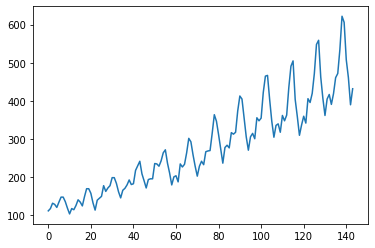

In [667]:
flights.passengers.plot();

In [668]:
flights_copy = flights.copy()
flights_copy

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [669]:
flights_copy.loc[np.random.randint(1, 144, 20), "passengers"] = None

In [670]:
flights_copy.isnull().sum()    #19 geldi ayni degerleri tekrar aldigi icin 20 gelmedi

year           0
month          0
passengers    20
dtype: int64

In [671]:
flights_copy["passengers"].interpolate().isnull().sum()

0

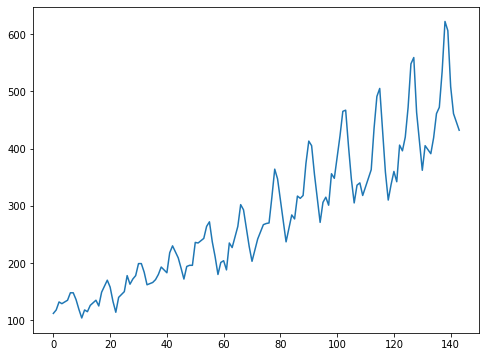

In [674]:
plt.figure(figsize =(8, 6))      
flights_copy["passengers"].interpolate().plot();

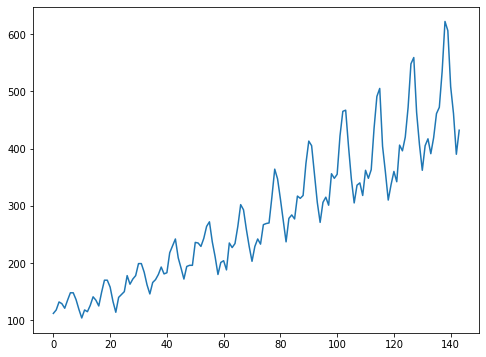

In [675]:
plt.figure(figsize =(8,6))
flights.passengers.plot();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________